Student name:Lavender Echessa

Student pace: full time


Scheduled project review date/time: 24/5/23

Instructor name:Samuel Karu

Blog post URL:https://github.com/lavEche/phase-3-project.git


# Predicting SyriaTel Customer Churn
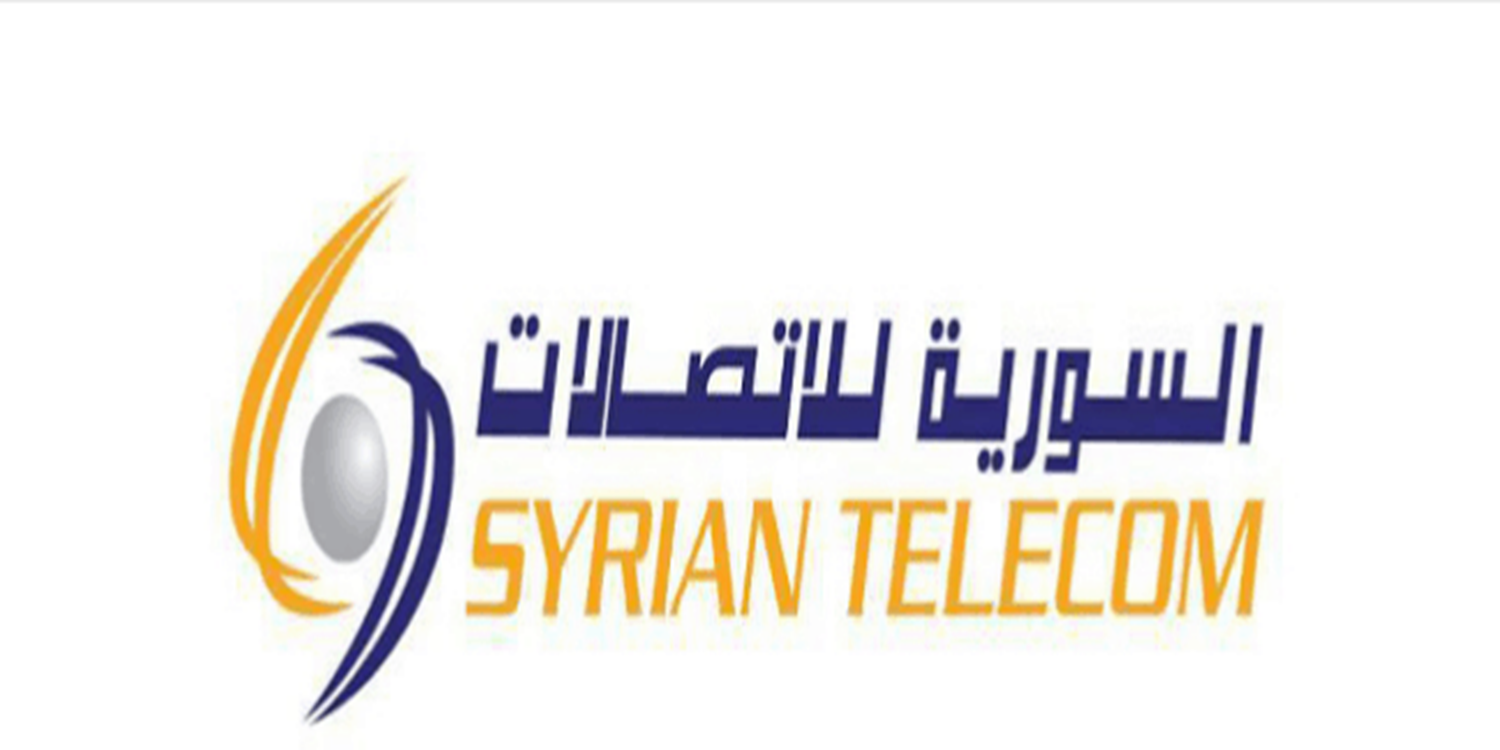

## BUSSINESS UNDERSTADING

This project aims to provide SyriaTel with a model to help predict whether a customer churn with SyriaTel, a telecommunications company.In an article about churn reduction in the telecom industry by the Database Marketing Institute,the artical states that "industry retention surveys have shown that while price and product are important, most people leave any service because of dissatisfaction with the way they are treated". With this in mind, we aim to highlight areas where customer service could be improved. Through research I find from this dataset, that SyriaTel has a churn rate of roughly 15% in customers who have been with the company for less than 245 days.

### Objectives

This project aims to:

1. Provide inferential statistics and visualisations based on this data.
2. Create predictive, supervised learning models from the data to predict churn 
3. Investigate labeled data on 3333 customers who have held accounts with the company

### Data:
This project utilises data from the https://www.kaggle.com/becksddf/churn-in-telecoms-dataset dataset from Kaggle.




### Imports 

In [1]:
# Import modules & packages


import pandas as pd 
import numpy as np 


import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler 

from scipy import stats

from sklearn.inspection import permutation_importance


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')


### Loading data

As mentioned earlier, the dataset can be downloaded directly from the Kaggle website here and saved into your desired directory.

In [2]:
#loading data
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

Exploring a dataset before applying any methods or processes to it is quite essential in understanding what it contains. This will allow you generate questions that can be used to derive insights from the data to make informed business decisions.

## DATA UNDERSTANDING

In [3]:
#columns check
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
#checking the number of columns
len(df.columns)

21

> This dataset has 21 columns.

In [5]:
#checking the number of rows
len(df)

3333

> This dataset has 3333 rows

If I want to display the first 10 rows:

In [6]:
#first 10 rows
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6           

If I want to display the last 10 rows in dataset:

In [7]:
df.tail(10)

state  account length  area code phone number international plan  \
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555                 no   
3326    OH              96        415     347-6812                 no   
3327    SC              79        415     348-3830                 no   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3323              no                      0              118.4   
3324              no                      0              169.8   
3325              no                      0              193.4   
3326              no                      0              106.6   
3327              no                      0              134.7   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3323              126             20.13  ...               97   
3324              114             28.87  ...              105   
3325               99             32.88  ...               88   
3326              128             18.12  ...               87   
3327               98             22.90  ...               68   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3323             21.19                227.0                 56   
3324             16.80                193.7                 82   
3325              9.94                243.3                109   
3326             24.21                178.9                 92   
3327             16.12                221.4                128   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3323               10.22                13.6                 3   
3324                8.72                11.6                 4   
3325               10.95                 9.3                 4   
3326                8.05                14.9                 7   
3327                9.96                11.8                 5   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3323               3.67                       5   True  
3324               3.13                       1  False  
3325               2.51                       2  False  
3326               4.02                       1  False  
3327               

Looking at the shape of the data:

In [8]:
df.shape

(3333, 21)

> The dataset contains 3333 rows and 21 columns

In [9]:
# info for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

> Most of the features are numerical except for state, phone_number, international_plan and voice_mail_plan which are strings and our target churn which is of boolean type.

##### Inspecting for unique values
Inspect the unique values of each feature to see if we have any 'null' values or any values that we don't expect which might be errors.

In [10]:
# inspect unique values of columns to identify potention errors or null values:
for col in df.columns:
    print(f"{col} vals:  {df[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1

> The Data has no errors and no null values.

In [11]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:
#checking value count in Churn Feature
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

#### Showing Caegorical features

In [13]:
df.select_dtypes(include=['bool', 'object', 'category'])



state phone number international plan voice mail plan  churn
0       KS     382-4657                 no             yes  False
1       OH     371-7191                 no             yes  False
2       NJ     358-1921                 no              no  False
3       OH     375-9999                yes              no  False
4       OK     330-6626                yes              no  False
...    ...          ...                ...             ...    ...
3328    AZ     414-4276                 no             yes  False
3329    WV     370-3271                 no              no  False
3330    RI     328-8230                 no              no  False
3331    CT     364-6381                yes              no  False
3332    TN     400-4344                 no             yes  False

[3333 rows x 5 columns]

#### Showing numerical data

In [14]:
num_df=df.select_dtypes(include=["int64","float64"])
num_df

account length  area code  number vmail messages  total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      total day calls  total day charge  total eve minutes  total eve calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  
0                  2.70                       1  
1                  3.70                       1  
2                  3.29                       0  
3                  1.78                       2  
4                  2.73                       3  
...                 ...                     ...  
3328               2.67                       2  
3329               2.59                       3  
3330               3.81                       2  
3331               1.35                       

#### Inspect statistics of numeric data

In [15]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

> All values seem to be okay.

### DATA PREPARATION

This is the process of removing Duplicates and unwanted observations from data.

#### Checking for duplicates

In [16]:
#finding total number of duplicates
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


> The dataset has no duplicates.

#### Checking for Missing Values

In [17]:
#checking for missing values in df
def identify_missing_values(df):
    """Identify is the data has missing values"""
    # identify if df has missing values(df.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has no missing values


In [18]:
#checking count of missing values in each column
df.isna().sum()
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

> The dataset has no missing values.

Data cleaning to eliminate unused columns of data

> We will get rid of columns of data that we are not considering in datasets.

In [19]:
df.drop('phone number', axis = 1, inplace = True)

> It is unlikely that phone number bears any weight in predicting churn, so we drop it from our dataset

#### consistent row naming

In [20]:
df1 = df.rename(index={
    0: 'Row_1',
    1: 'Row_2',
    2: 'Row_3',
    3: 'Row_4',
    4: 'Row_5,'
   
})

#the updated dataframe
df1.head()

state  account length  area code international plan voice mail plan  \
Row_1     KS             128        415                 no             yes   
Row_2     OH             107        415                 no             yes   
Row_3     NJ             137        415                 no              no   
Row_4     OH              84        408                yes              no   
Row_5,    OK              75        415                yes              no   

        number vmail messages  total day minutes  total day calls  \
Row_1                      25              265.1              110   
Row_2                      26              161.6              123   
Row_3                       0              243.4              114   
Row_4                       0              299.4               71   
Row_5,                      0              166.7              113   

        total day charge  total eve minutes  total eve calls  \
Row_1              45.07              197.4               99   
Row_2              27.47              195.5              103   
Row_3              41.38              121.2              110   
Row_4              50.90               61.9               88   
Row_5,             28.34              148.3              122   

        total eve charge  total night minutes  total night calls  \
Row_1              16.78                244.7                 91   
Row_2              16.62                254.4                103   
Row_3              10.30                162.6                104   
Row_4               5.26                196.9                 89   
Row_5,             12.61                186.9                121   

        total night charge  total intl minutes  total intl calls  \
Row_1                11.01                10.0                 3   
Row_2                11.45                13.7                 3   
Row_3                 7.32                12.2                 5   
Row_4                 8.86                 6.6                 7   
Row_5,                8.41                10.1                 3   

        total intl charge  customer service calls  churn  
Row_1                2.70                       1  False  
Row_2                3.70                       1  False  
Row_3                3.29                       0  False  
Row_4                1.78                       2  False  
Row_5,               2.73                       3  False

>I have used rename() method is used to rename the rows in the dataframe using a dictionary that maps the old row numbers to the new row names. The updated dataframe displays the first 5 rows.

### Outliers

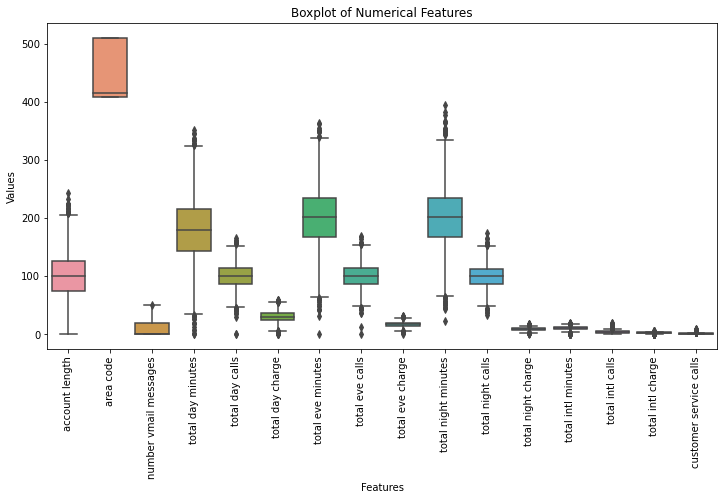

In [21]:
#checking for outlier 
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()


### EXPLORATORY DATA ANALYSIS

In [22]:
corr_df=df.corr()
corr_df

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation it is observed there is correlation coefficients between variables. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 indicate little to no correlation.

#### Checking correlation in numerical feautures

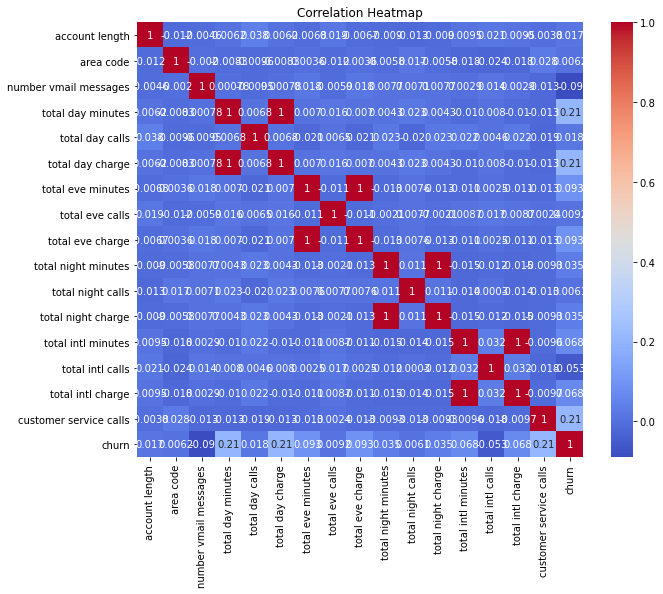

In [23]:
#Explore the correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

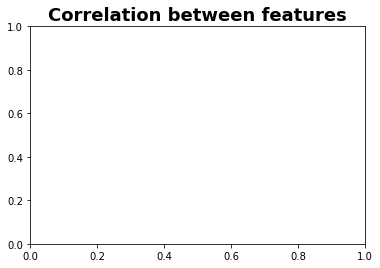

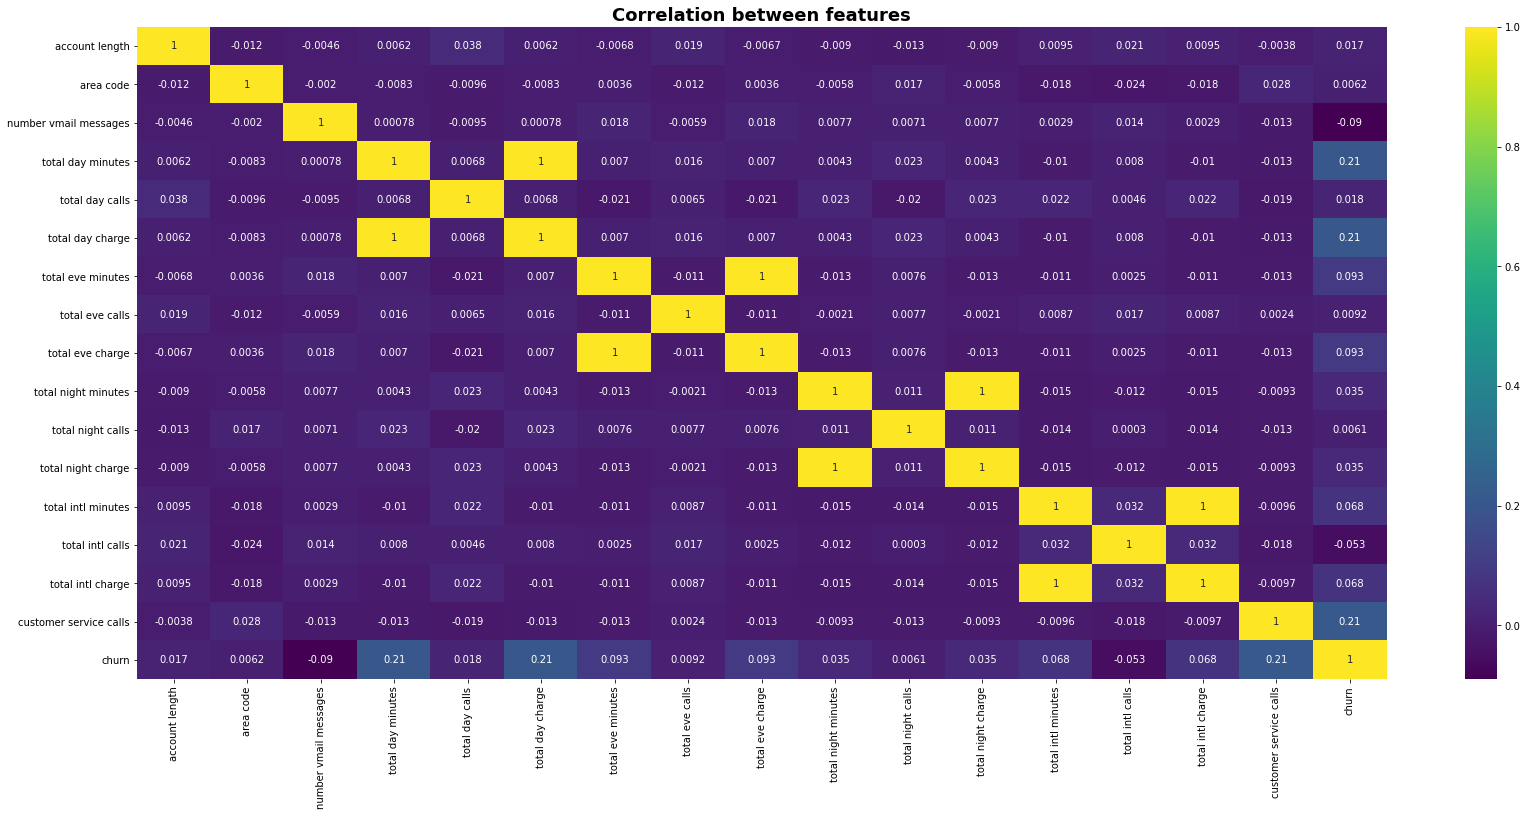

In [24]:
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(28,12))
ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);

In [25]:
corr_df_target = corr_df['churn'].to_frame()

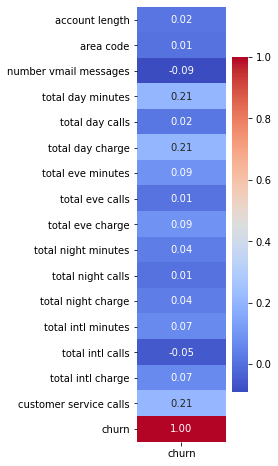

In [26]:
plt.figure(figsize = (2, 8))
corr_target_hm = sns.heatmap(
                corr_df_target, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm"

)

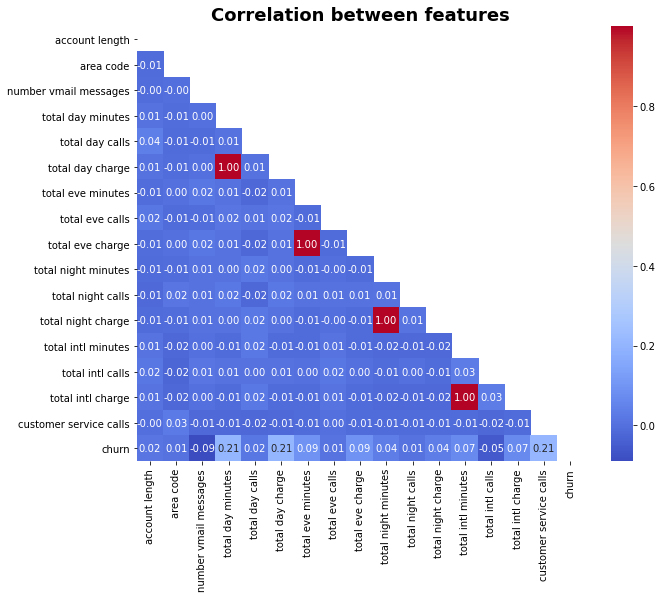

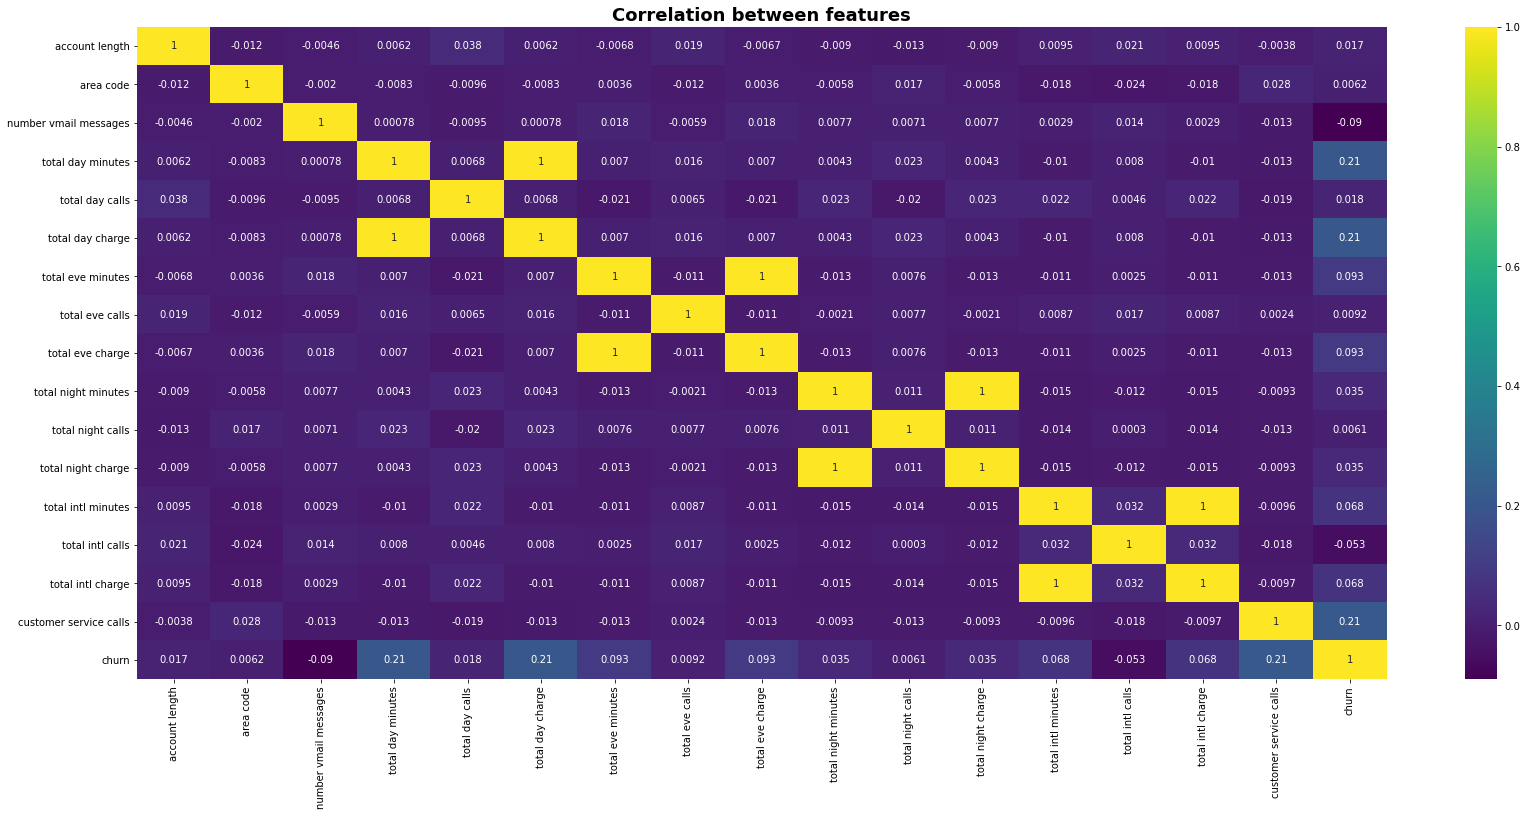

In [27]:
plt.figure(figsize = (10, 8))
corr_all_hm = sns.heatmap(
                corr_df, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(corr_df, dtype=bool)),
                annot_kws={"size": 10}
            )
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(28,12))
ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);

Observation
>Darker shades (closer to -1 or 1) represent stronger correlations, while lighter shades (closer to 0) indicate weaker or no correlation.Positive correlations are indicated by values closer to 1, while negative correlations are indicated by values closer to -1.Variables with high positive correlation coefficients (close to 1) are positively associated, meaning they tend to increase or decrease together.Variables with high negative correlation coefficients (close to -1) are negatively associated, meaning when one variable increases, the other tends to decrease.


#### Dropping Highly-Correlated Features

>Dropping features that have a correlation of 0.9 or above.

In [28]:
abs(df.corr()) > .9

account length  area code  number vmail messages  \
account length                    True      False                  False   
area code                        False       True                  False   
number vmail messages            False      False                   True   
total day minutes                False      False                  False   
total day calls                  False      False                  False   
total day charge                 False      False                  False   
total eve minutes                False      False                  False   
total eve calls                  False      False                  False   
total eve charge                 False      False                  False   
total night minutes              False      False                  False   
total night calls                False      False                  False   
total night charge               False      False                  False   
total intl minutes               False      False                  False   
total intl calls                 False      False                  False   
total intl charge                False      False                  False   
customer service calls           False      False                  False   
churn                            False      False                  False   

                        total day minutes  total day calls  total day charge  \
account length                      False            False             False   
area code                           False            False             False   
number vmail messages               False            False             False   
total day minutes                    True            False              True   
total day calls                     False             True             False   
total day charge                     True            False              True   
total eve minutes                   False            False             False   
total eve calls                     False            False             False   
total eve charge                    False            False             False   
total night minutes                 False            False             False   
total night calls                   False            False             False   
total night charge                  False            False             False   
total intl minutes                  False            False             False   
total intl calls                    False            False             False   
total intl charge                   False            False             False   
customer service calls              False            False             False   
churn                               False            False             False   

                        total eve minutes  total eve calls  total eve charge  \
account length                      False            False             False   
area code                           False            False             False   
number vmail messages               False            False             False   
total day minutes                   False            False             False   
total day calls                     False            False             False   
total day charge                    False            False             False   
total eve minutes                    True            False              True   
total eve calls                     False             True             False   
total eve charge                     True            False              True   
total night minutes                 False            False             False   
total night calls                   False            False             False   
total night charge                  False            False             False   
total intl minutes                  False            False             False   
total intl calls                    False            False             False   
total intl cha

##### Checking normality in numerical columns

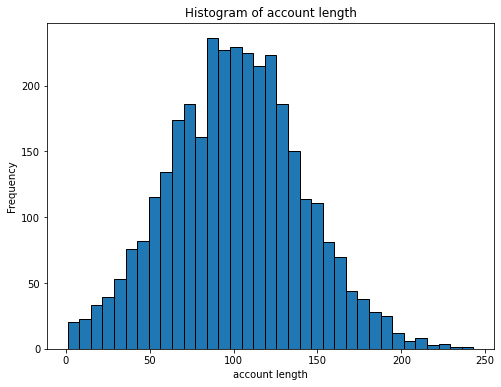

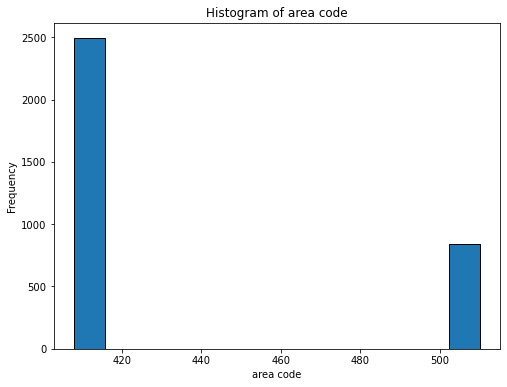

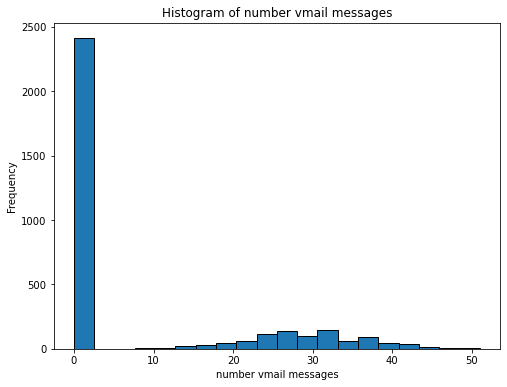

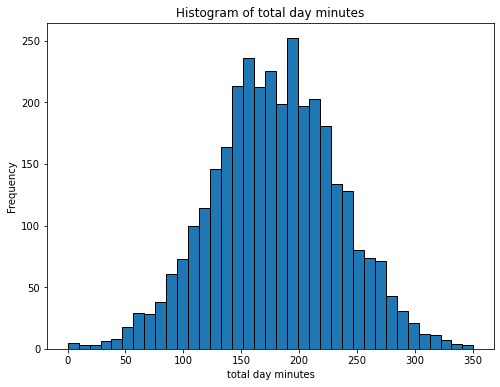

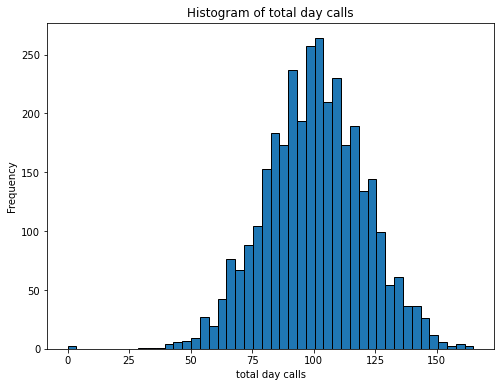

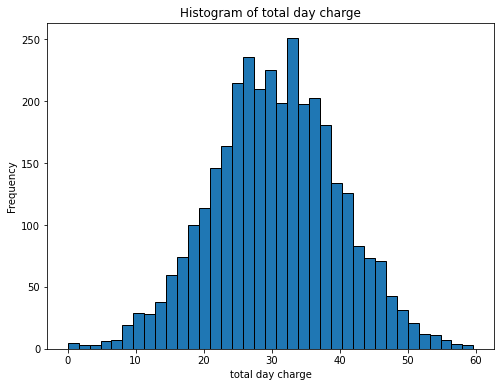

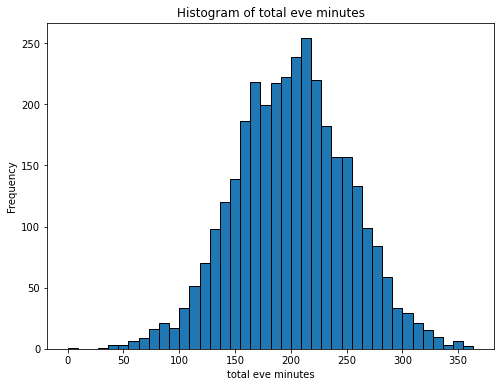

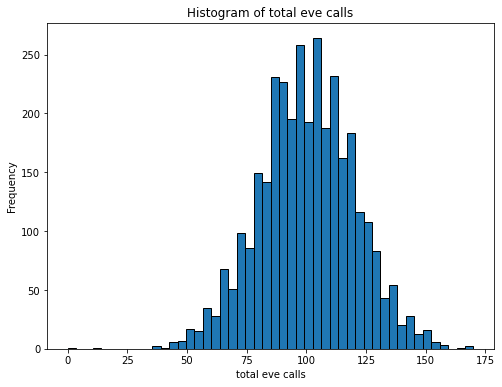

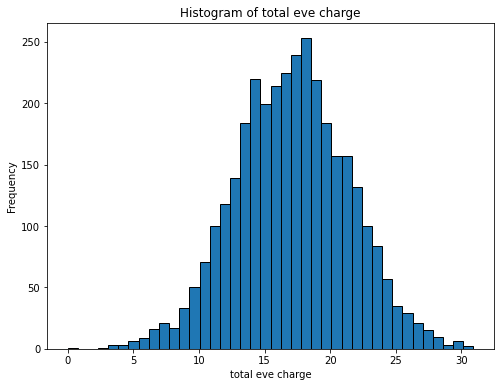

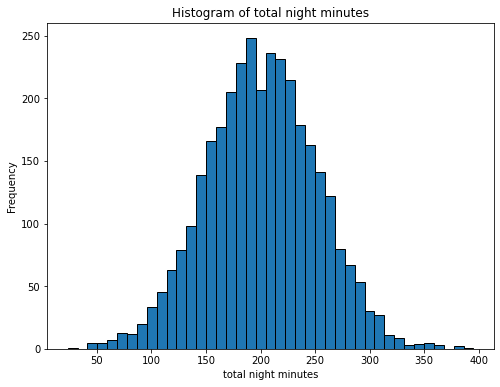

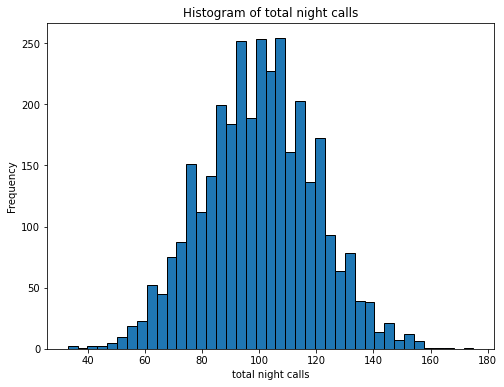

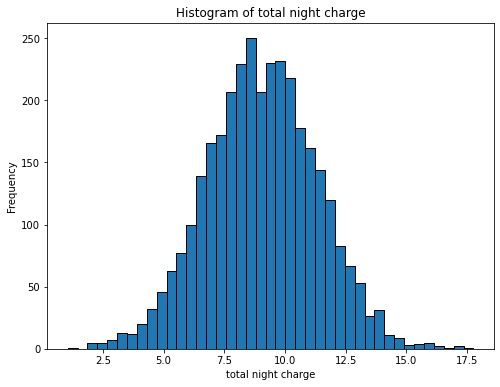

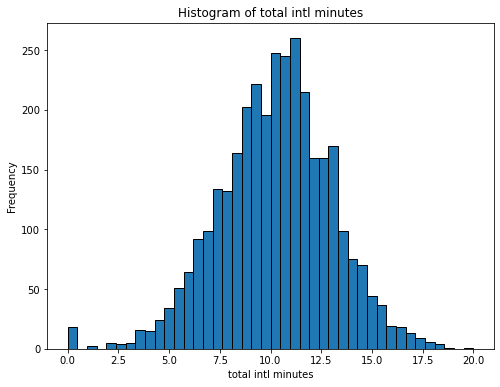

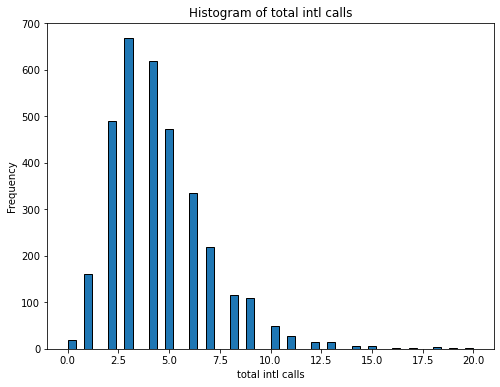

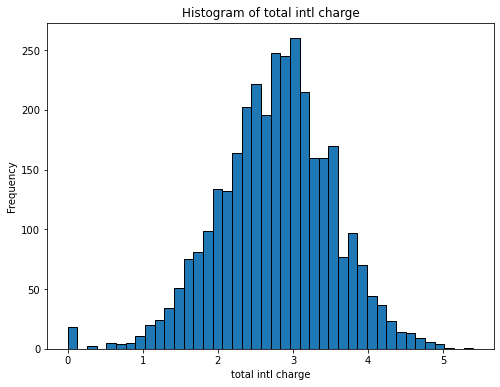

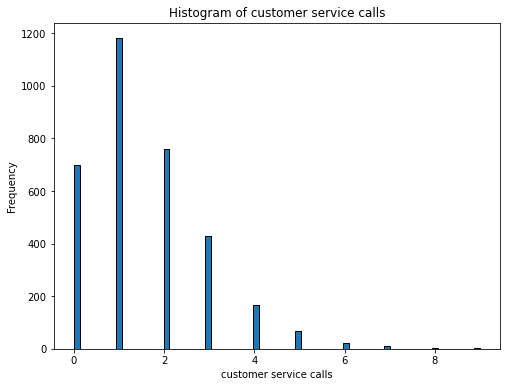

In [29]:
# Numerical columns: Histograms
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins='auto', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Observation
For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

##### Bivarate Analysis in categorical columns

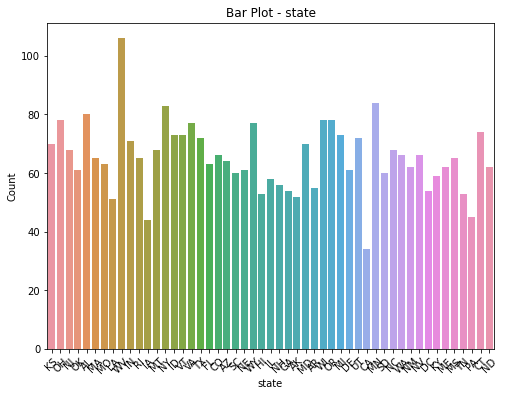

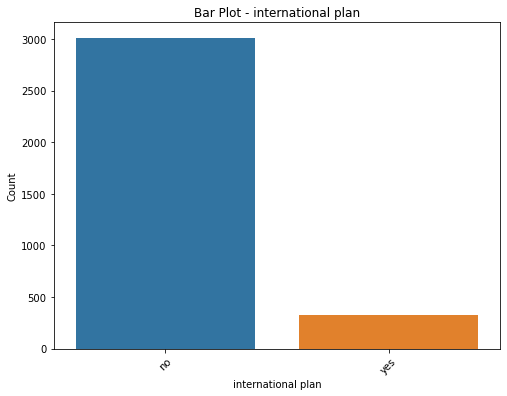

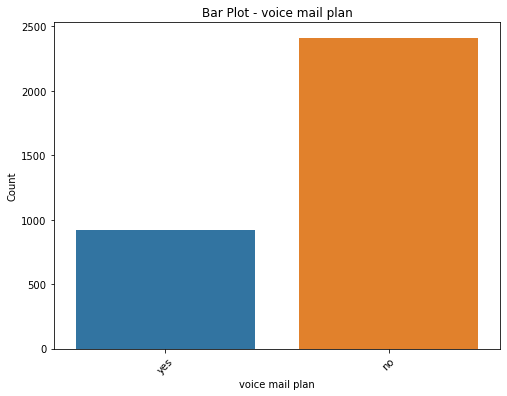

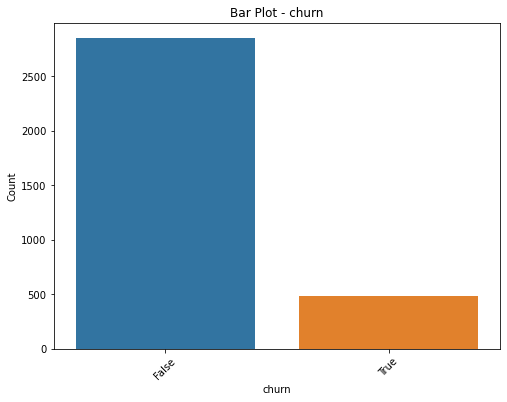

In [30]:
# Categorical columns: Bar plots
categorical_columns = df.select_dtypes(include=['bool', 'object', 'category']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Plot - {column}')
    plt.xticks(rotation=45)
    plt.show()

##### Analyzing Dependent Variable 

Let's inspect the number churned customers in this dataset:

In [31]:
#finding unique value inside churn column
df["churn"].unique()

array([False,  True])

> Churn feaure array contains only boolean values.

In [32]:
#checking for count of true or false in churn features
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

> False has 2850 values while True has 483 values.

##### Visualizing Dependent Variable 

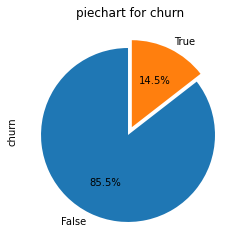

In [33]:
df['churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90)
plt.title("piechart for churn")
plt.show()

Observation

> The piechart shows that 85.5% of the customers are staying at syriaTel communication while 14.5% who are going to churn

#### Analyzing Independent Variables

##### Analyzing State column

In [34]:
#checking unique values in state column
df['state'].nunique()

51

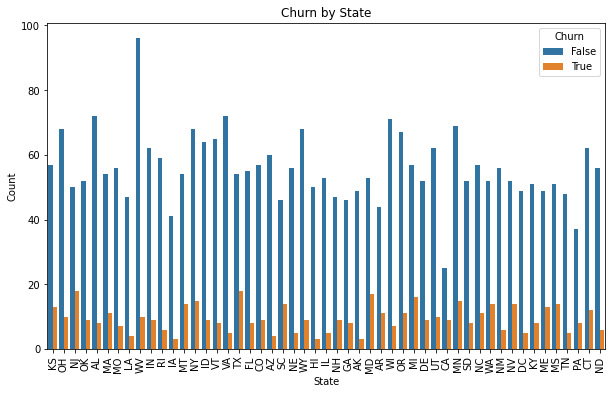

In [35]:
#visualizing state feature 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='state', hue='churn')
plt.title("Churn by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Churn", loc="upper right")
plt.show()

Observation
> from the plot we can see that WV has the highestnumber of customer churn rate while CA has the least number of customer churn rate.

###### Checking State with most Churn rate

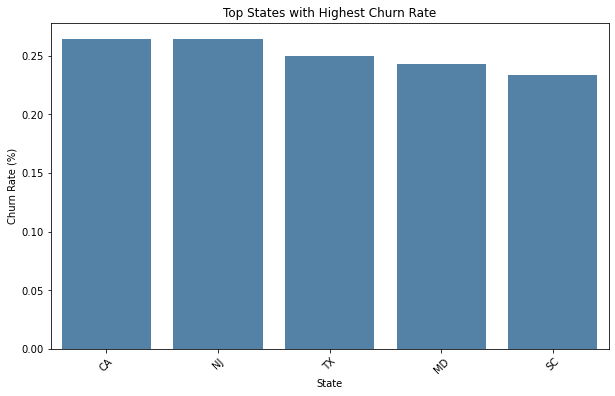

In [36]:
# Calculate churn rate by state
state_churn_rate = df.groupby('state')['churn'].mean().reset_index()

# Identify states with the highest churn rates
top_states = state_churn_rate.nlargest(5, 'churn')

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='state', y='churn', color='steelblue')
plt.title("Top States with Highest Churn Rate")
plt.xlabel("State")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

Observation
> It is observed that CA,NJ,TX,MD and SC have higher churn rate more than 0.21.

######  Analyzing Area Code Column

area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


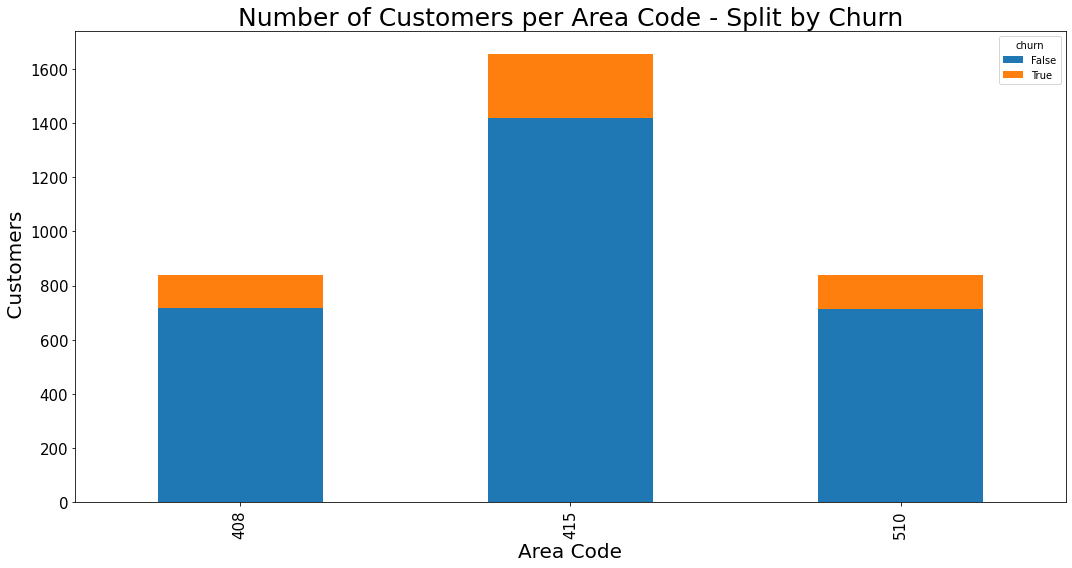

In [37]:
# percentage of churn by area code
print(df.groupby(["area code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
df.groupby(['area code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel(' Customers', fontsize = 20)
plt.tight_layout()


> in the above data we notice that there are 3 unique values ie 408,415,510 and churn rates of these area codes are almost the same . there is no relationship between area code and churn to which the customer leaves the operator so we can drop area code  

##### Analyzing account length  Column

In [38]:
#separating churn and non churn customers
churn_df=df[df["churn"]==bool(True)]
not_churn_df=df[df["churn"]==bool(False)]

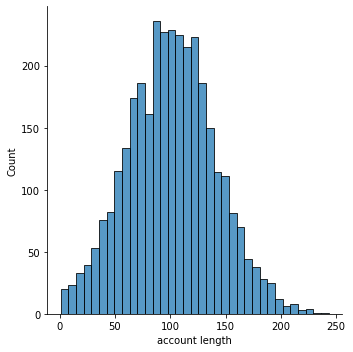

In [39]:
#Account length vs churn
sns.displot(df["account length"])

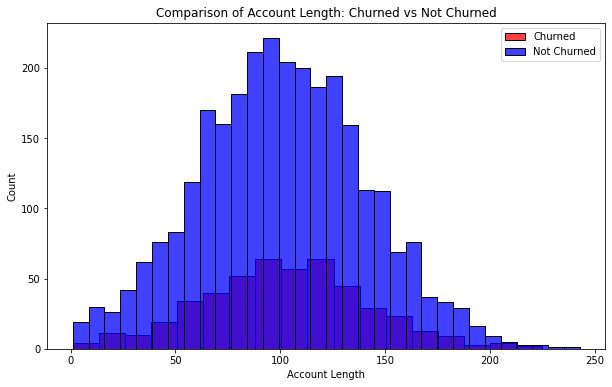

In [40]:
#comparison of churned account length and not churned account length
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_df, x='account length', color='red', label='Churned')
sns.histplot(data=not_churn_df, x='account length', color='blue', label='Not Churned')
plt.title("Comparison of Account Length: Churned vs Not Churned")
plt.xlabel("Account Length")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation
> After analyzing various aspects of the account length column, i did not find any useful relation between account length and  churn 

##### Analyzing International plan column

In [41]:
#showing count of value of "yes" an no
df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [42]:
#checking for unique values
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [43]:
#calculating international plan vs churn percentage
international_plan_churn = df[df['international plan'] == 'yes']['churn'].mean() * 100
no_international_plan_churn = df[df['international plan'] == 'no']['churn'].mean() * 100

# Print the results
print("Churn Percentage for Customers with International Plan: {:.2f}%".format(international_plan_churn))
print("Churn Percentage for Customers without International Plan: {:.2f}%".format(no_international_plan_churn))

Churn Percentage for Customers with International Plan: 42.41%
Churn Percentage for Customers without International Plan: 11.50%


<AxesSubplot:xlabel='international plan', ylabel='count'>

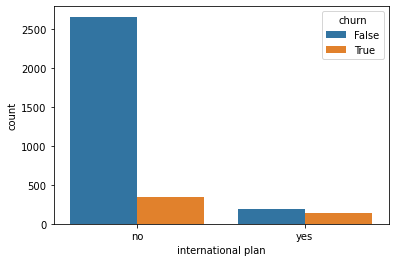

In [44]:
sns.countplot(x="international plan",hue="churn",data=df)

Observation
> There are 3010 customers who dont have international plan. There are 323 customers who have international plan.among those who have international plan re 42.4% people churn whereas 11.4% people dont have internaional plan. so the people who bought international plan are churning in big numbers beacause connectivity issues or high call charge.

#### Analyzing voice mail plan column

In [45]:
#show unique values in voicemail plan
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

In [46]:
# Calculate churn percentage for customers with and without a voice mail plan
voice_mail_churn_percentage = (df[df['voice mail plan'] == 'yes']['churn'].sum() / df[df['voice mail plan'] == 'yes']['churn'].count()) * 100
no_voice_mail_churn_percentage = (df[df['voice mail plan'] == 'no']['churn'].sum() / df[df['voice mail plan'] == 'no']['churn'].count()) * 100

# Print the results
print("Churn Percentage for Customers with Voice Mail Plan: {:.2f}%".format(voice_mail_churn_percentage))
print("Churn Percentage for Customers without Voice Mail Plan: {:.2f}%".format(no_voice_mail_churn_percentage))

Churn Percentage for Customers with Voice Mail Plan: 8.68%
Churn Percentage for Customers without Voice Mail Plan: 16.72%


<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

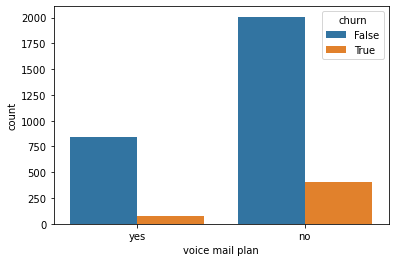

In [47]:
sns.countplot(x="voice mail plan",hue="churn",data=df)

Observation
> there is no clear relationship between voicemail and churn.

#### One Hot Encode state

Transforming churn feature to binary

In [48]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [49]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

Create dummy out our categorical column for modelling. To do this, we will use a one hot encoder to.

In [50]:
dummy_df_state = pd.get_dummies(df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


df = pd.concat([df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['state','area code','international plan','voice mail plan'],axis=1)
df.head()

account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  ...  state_is_VT  state_is_WA  \
0                244.7                 91  ...            0            0   
1                254.4                103  ...            0            0   
2                162.6                104  ...            0            0   
3                196.9                 89  ...            0            0   
4                186.9                121  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0            0            0            0                 0                 1   
1            0            0            0                 0                 1   
2            0            0            0                 0                 1   
3            0            0            0                 1                 0   
4            0            0            0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0  

[5 rows x 72 columns]

#### Train Test split

Creating X, y variables:

In [51]:
# create X:
X = df.drop('churn', axis = 1)

# create y:
y = df.churn

Splitting dataset

> I will split the dataset 80% with random state of 42

In [52]:
# initial split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###### Scaling Numerical Features
Min-Max Normalization method is used to reduce the effects of outliers in the dataset. By applying the  method, standard deviation issues will be solved.

In [53]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

account length  number vmail messages  total day minutes  total day calls  \
0        0.524793               0.490196           0.755701         0.666667   
1        0.438017               0.509804           0.460661         0.745455   
2        0.561983               0.000000           0.693843         0.690909   
3        0.342975               0.000000           0.853478         0.430303   
4        0.305785               0.000000           0.475200         0.684848   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          0.755701           0.542755         0.582353          0.542866   
1          0.460597           0.537531         0.605882          0.537690   
2          0.693830           0.333242         0.647059          0.333225   
3          0.853454           0.170195         0.517647          0.170171   
4          0.475184           0.407754         0.717647          0.407959   

   total night minutes  total night calls  ...  state_is_VT  state_is_WA  \
0             0.595750           0.408451  ...          0.0          0.0   
1             0.621840           0.492958  ...          0.0          0.0   
2             0.374933           0.500000  ...          0.0          0.0   
3             0.467187           0.394366  ...          0.0          0.0   
4             0.440290           0.619718  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 72 columns]

###### Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature
This algorithm will help to overcome the overfitting problem posed by random oversampling. It will focus on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
It also aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [54]:
df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2666, 71)
Before OverSampling, the shape of y_train: (2666,)
After OverSampling, the shape of X_train_over: (4568, 71)
After OverSampling, the shape of y_train_over: (4568,)


In [56]:
y_train_over.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

In [57]:
churn = df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [58]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

### MODELLING

Model 1: Logisic regression classifier

My first model will be Logistic Regression Classifier and it will be use d to create a baseline model.

In [59]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

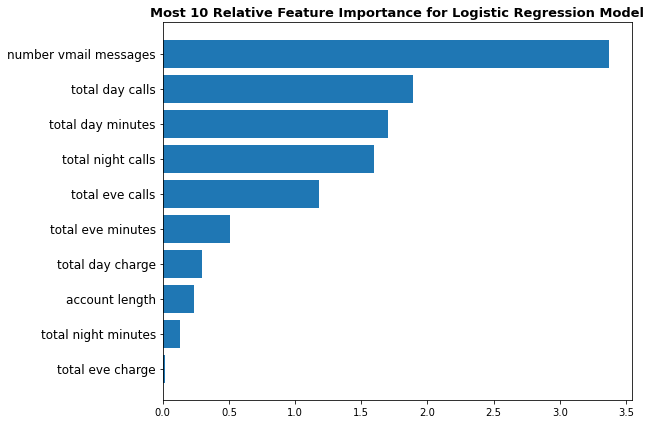

In [60]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

Observation
> The bar chart represents the relative importance of the top 10 features in the logistic regression model.Features with higher bars are number of vmail messages, total day calls,total day mins indicate greater importance in predicting the target variable  which is churn.

In [61]:
#classification report
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       566
           1       0.28      0.66      0.40       101

    accuracy                           0.70       667
   macro avg       0.60      0.68      0.60       667
weighted avg       0.82      0.70      0.74       667



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.69565
F1 score for testing set:  0.39763
Recall score for testing set:  0.66337
Precision score for testing set:  0.2839


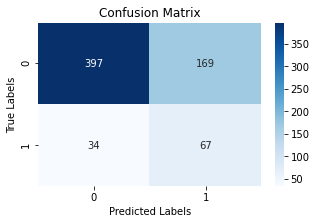

In [62]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Observation
>According to the logistic regression classifier model, total day charge, number of voicemail messages and total evening charge are the top three important features.
Model accuracy is 69.5%, which isn't bad. F1 score is only 39.7% 

Model 2 : Random Forest Classifier

Random Forest Classifier wiill create decision trees on randomly selected data samples, and get prediction from each tree and selects the best solution by means of voting. 

In [63]:
# Object creation, fitting the data & getting predictions 
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model_final.predict(X_test)

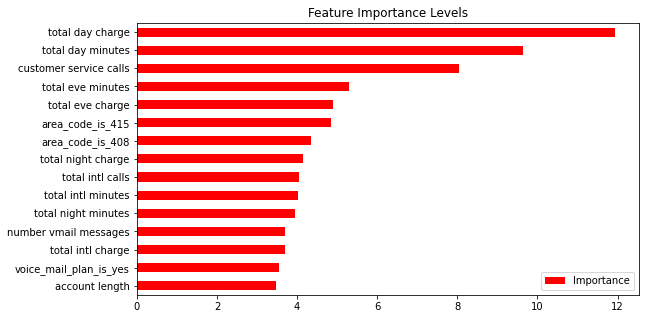

In [64]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

Observation
>The horizontal bar chart represents the importance levels of the top 15 features in the random forest model.Features with longer bars on the right side indicate higher importance levels in predicting the target variable which is churn.

In [65]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.85      0.59      0.70       101

    accuracy                           0.92       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667



**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.92204
F1 score for testing set:  0.69767
Recall score for testing set:  0.59406
Precision score for testing set:  0.84507


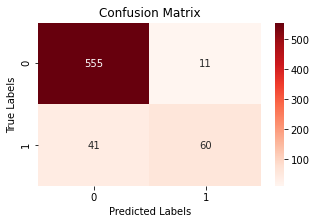

In [66]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Observation
>According to the random forest classifier, total day charge, customer service calles and "international plan is yes" features have the highest impact on the model.Accuracy and F1 score are much higher for this model, which is good.

Model 3:Decision Tree Classifier

For third model, I will fit a  Decision Tree Classifier to the X_test

In [67]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

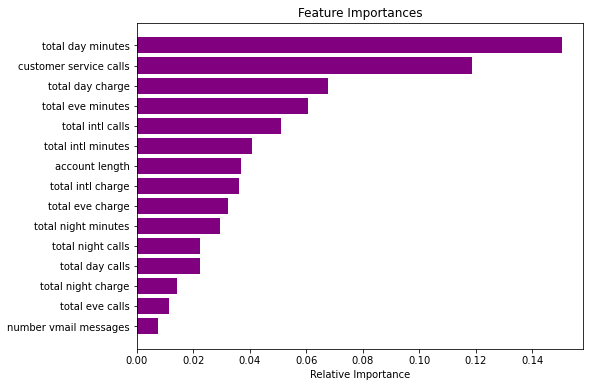

In [68]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation
The horizontal bar chart represents the relative importance levels of the top 15 features in the decision tree model.Features with longer bars on the right side indicate higher importance values in predicting the target variable.

In [69]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.95      0.87      0.91       566
           1       0.51      0.76      0.61       101

    accuracy                           0.85       667
   macro avg       0.73      0.82      0.76       667
weighted avg       0.89      0.85      0.87       667



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.85457
F1 score for testing set:  0.61355
Recall score for testing set:  0.76238
Precision score for testing set:  0.51333


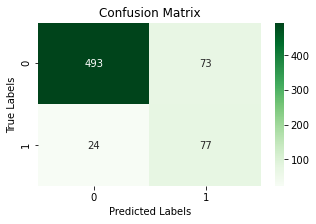

In [70]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

According to the decision tree classifier, customer service calls total day charge and total evening charge are the three most important for the model.The accuracy and F1 score for this model is not as great as random forest classifier.

###### Comparing Models

I shall use ROC curve to compare the models

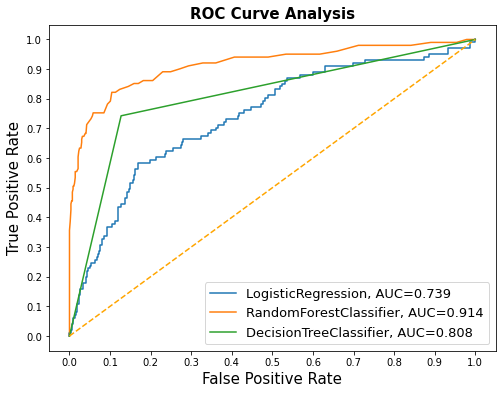

In [72]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Definingdf3 as a DataFrame
df3 = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    df3 = df3.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Setting name of the classifiers as index labels
df3.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in df3.index:
    plt.plot(df3.loc[i]['fpr'], 
             df3.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, df3.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Observation
>The best performing models in ROC curve has a curve that hugs the upper left of the graph, which is Gradient Boosting classifier  in this case.

Model Comparisons of F1 Score

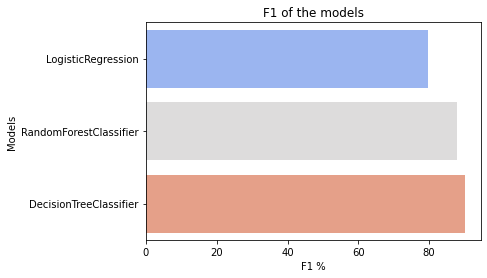

In [73]:
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models');

In [74]:
results.sort_values(by="F1",ascending=False)

Models         F1
0  DecisionTreeClassifier  90.004578
0  RandomForestClassifier  87.781975
0      LogisticRegression  79.650319

Obervation
>Random forest classifier had the highest F1 score. false negative have more of a business impact.

Model Comparisons on Accuracy

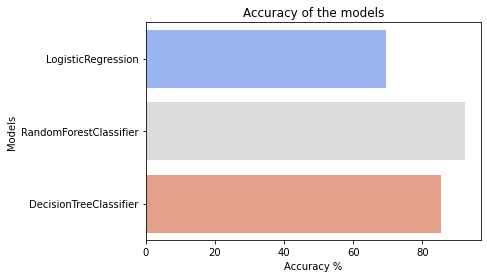

In [75]:
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

In [76]:
results.sort_values(by="Accuracy",ascending=False)

Models   Accuracy
0  RandomForestClassifier  92.203898
0  DecisionTreeClassifier  85.457271
0      LogisticRegression  69.565217

Obervation
> The best performing model will have the highest accuracy which is  random forest classifier.

### CONCLUSSION

Best model:
>The best model to use is Random forest tree which produced the highest AUC-ROC score.

### RECOMMENDATIONS

It was highlighted during the EDA of this project that there are many areas which the company could improve to help reduce high churn factors. Below are some possible suggestions of what could be further investigated:

1. Further investigate the characteristics of customers who made a high number of calls to customer service. 
2. Given the high churn rate (over 42%) among international plan holders, focus on retention efforts for these customers. 
3. Investigate the states with high churn rates to identify any specific trends or issues causing the churn. Analyze factors such as pricing, competition, network coverage, or customer satisfaction levels in these states.
4. Consider segmenting customers based on their characteristics, usage patterns, or preferences. 
5. Focus on enhancing the overall customer experience across different touchpoints.
6. Implement proactive communication and outreach strategies to engage customers and address their needs. 
7.Establish a system for continuous monitoring of key metrics and customer feedback. 

